In [ ]:
 # Import essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob#Step 6: Read the CSV in Pandas
import pandas as pd
# Example using a CSV file
df = pd.read_csv('/content/US_violent_crime.csv')


In [ ]:
# Display basic statistics
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
!kaggle kernels pull kerneler/starter-violent-crime-rates-by-us-2f54581a-3

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


DataFrame Columns After Cleaning: ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
Shape: (50, 6)
         Murder     Assault   UrbanPop       Rape  Total_Crime
count  50.00000   50.000000  50.000000  50.000000    50.000000
mean    7.78800  170.760000  65.540000  21.232000   178.548000
std     4.35551   83.337661  14.474763   9.366385    86.869217
min     0.80000   45.000000  32.000000   7.300000    45.800000
25%     4.07500  109.000000  54.500000  15.075000   113.725000
50%     7.25000  159.000000  66.000000  20.100000   165.450000
75%    11.25000  249.000000  77.750000  26.175000   263.000000
max    17.40000  337.000000  91.000000  46.000000   350.400000


<ipython-input-29-7b43c569ab60>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




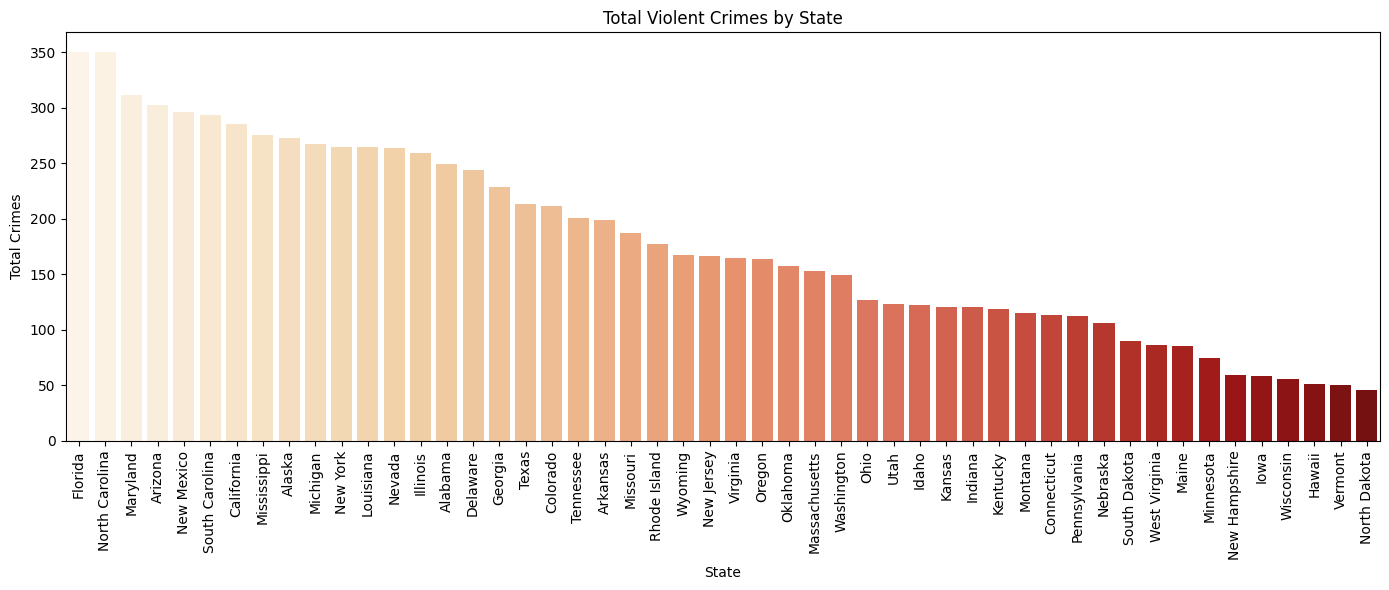

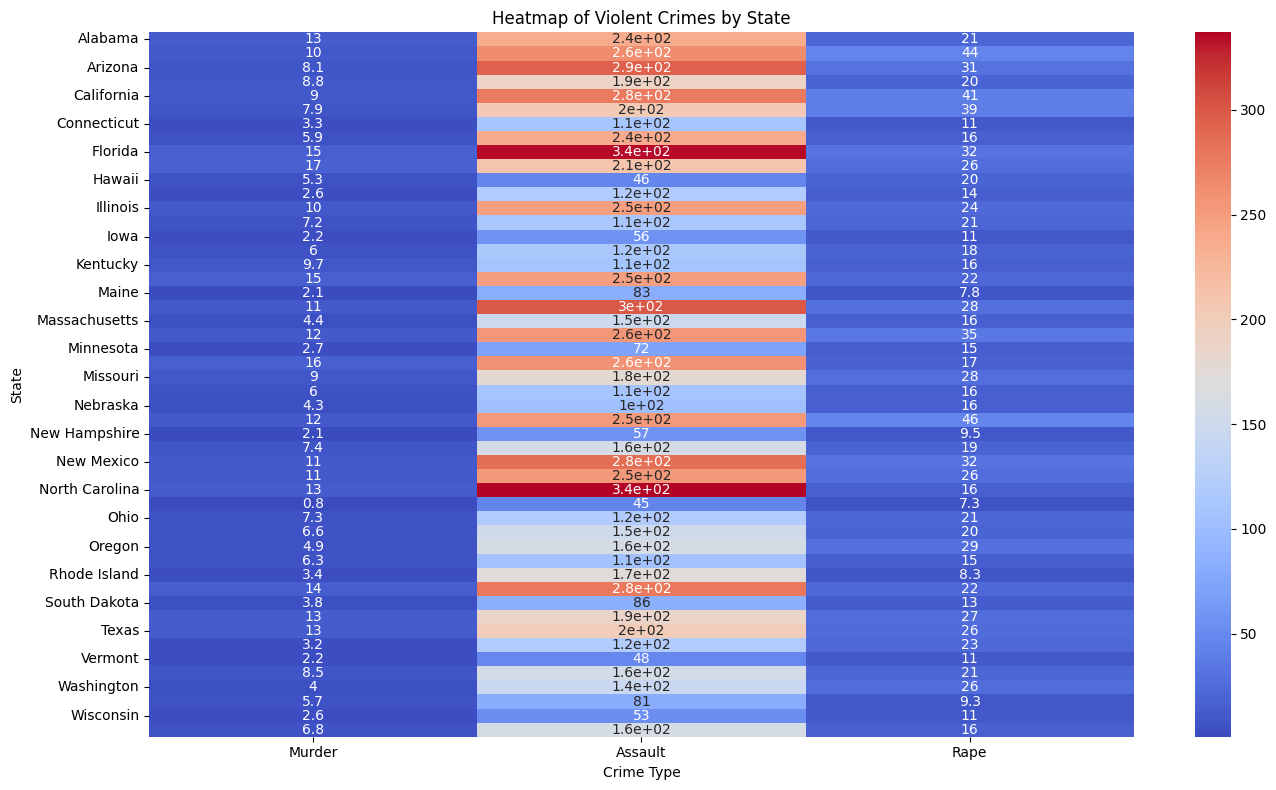

In [ ]:
# 🔹 Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 🔹 Step 2: Load the Dataset
df = pd.read_csv('/content/US_violent_crime.csv')  # Make sure this file exists

# 🔹 Step 3: Clean Column Names and Rename the State Column
df.columns = df.columns.str.strip()
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)

# 🔹 Step 4: Check Columns
print("DataFrame Columns After Cleaning:", df.columns.tolist())

# 🔹 Step 5: Drop Missing Values
df.dropna(inplace=True)

# 🔹 Step 6: Add a Total Crime Column (no 'Robbery' in this dataset)
df['Total_Crime'] = df[['Murder', 'Assault']].sum(axis=1)

# 🔹 Step 7: Summary Statistics
print("Shape:", df.shape)
print(df.describe())

# 🔹 Step 8: Bar Plot - Total Crimes by State
state_crime = df.groupby('State')['Total_Crime'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=state_crime.index, y=state_crime.values, palette='OrRd')
plt.xticks(rotation=90)
plt.title("Total Violent Crimes by State")
plt.ylabel("Total Crimes")
plt.tight_layout()
plt.show()

# 🔹 Step 9: Line Plot - Can't group by 'Year' since it's not in dataset
# We'll skip this unless you add a 'Year' column

# 🔹 Step 10: Heatmap - Crime by State (No year dimension)
plt.figure(figsize=(14,8))
sns.heatmap(df.set_index('State')[['Murder', 'Assault', 'Rape']], cmap='coolwarm', annot=True)
plt.title("Heatmap of Violent Crimes by State")
plt.xlabel("Crime Type")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# 🔹 Step 11: Choropleth Map - Total Crimes by State (Plotly)
map_df = df.copy()
map_df['Total'] = df[['Murder', 'Assault', 'Rape']].sum(axis=1)

fig = px.choropleth(map_df,
                    locations='State',
                    locationmode='USA-states',
                    color='Total',
                    scope='usa',
                    title='Total Violent Crimes by State (USA)')
fig.show()


<ipython-input-30-251d43b167ec>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-30-251d43b167ec>:30: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



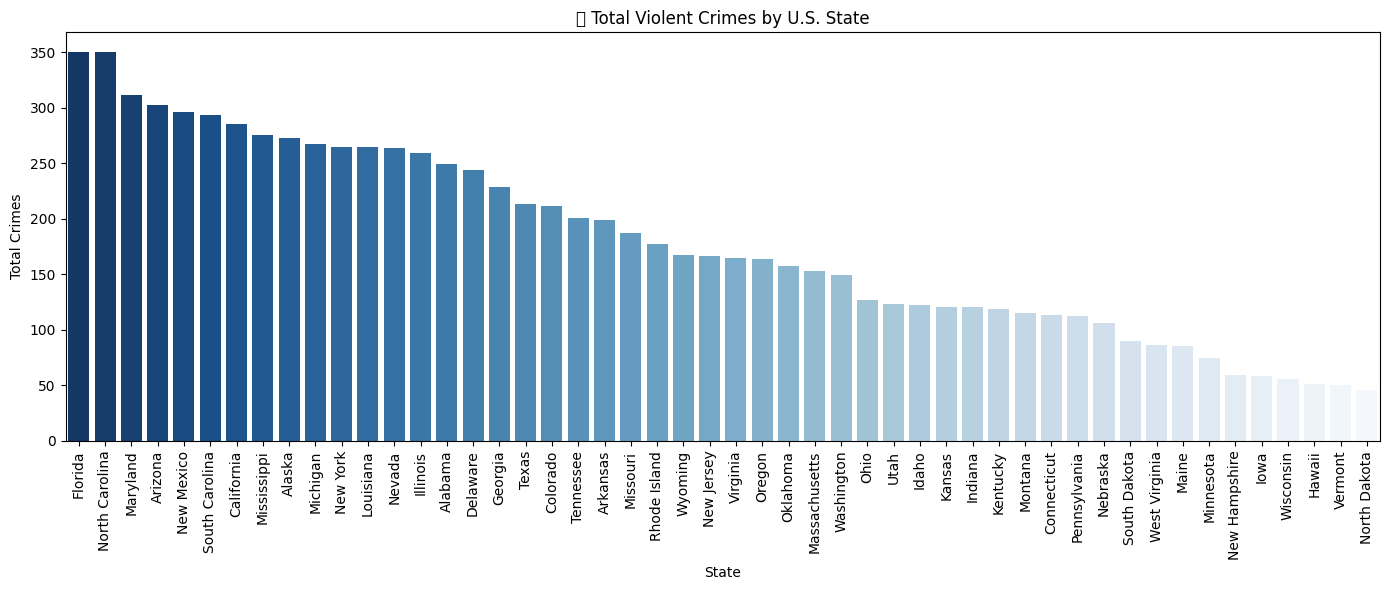

<ipython-input-30-251d43b167ec>:42: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



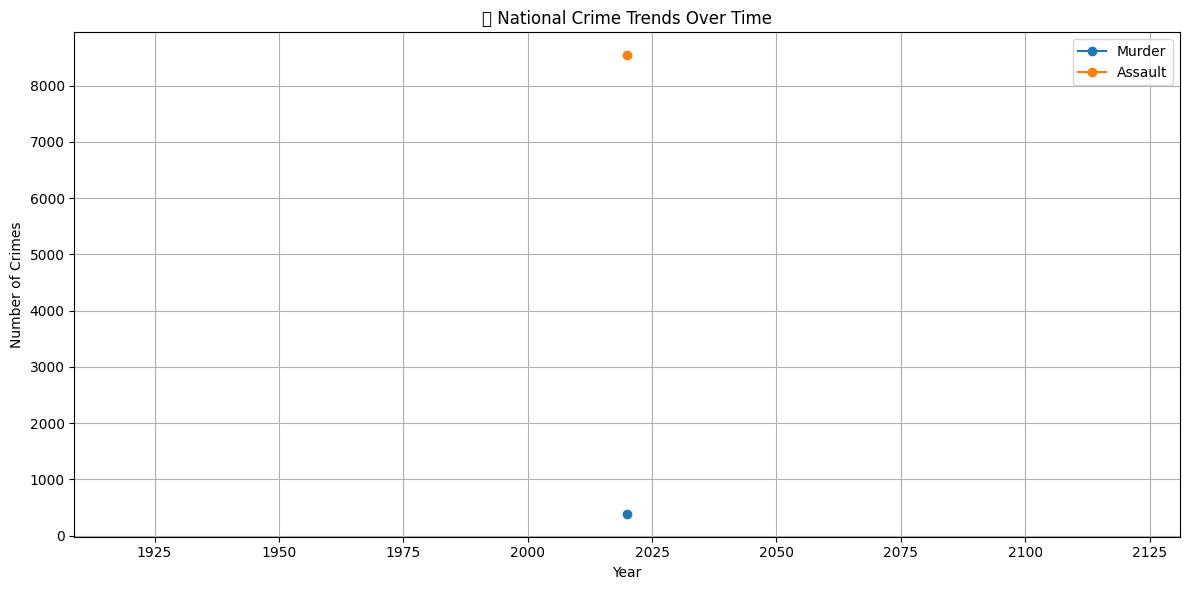

<ipython-input-30-251d43b167ec>:52: UserWarning:

Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.



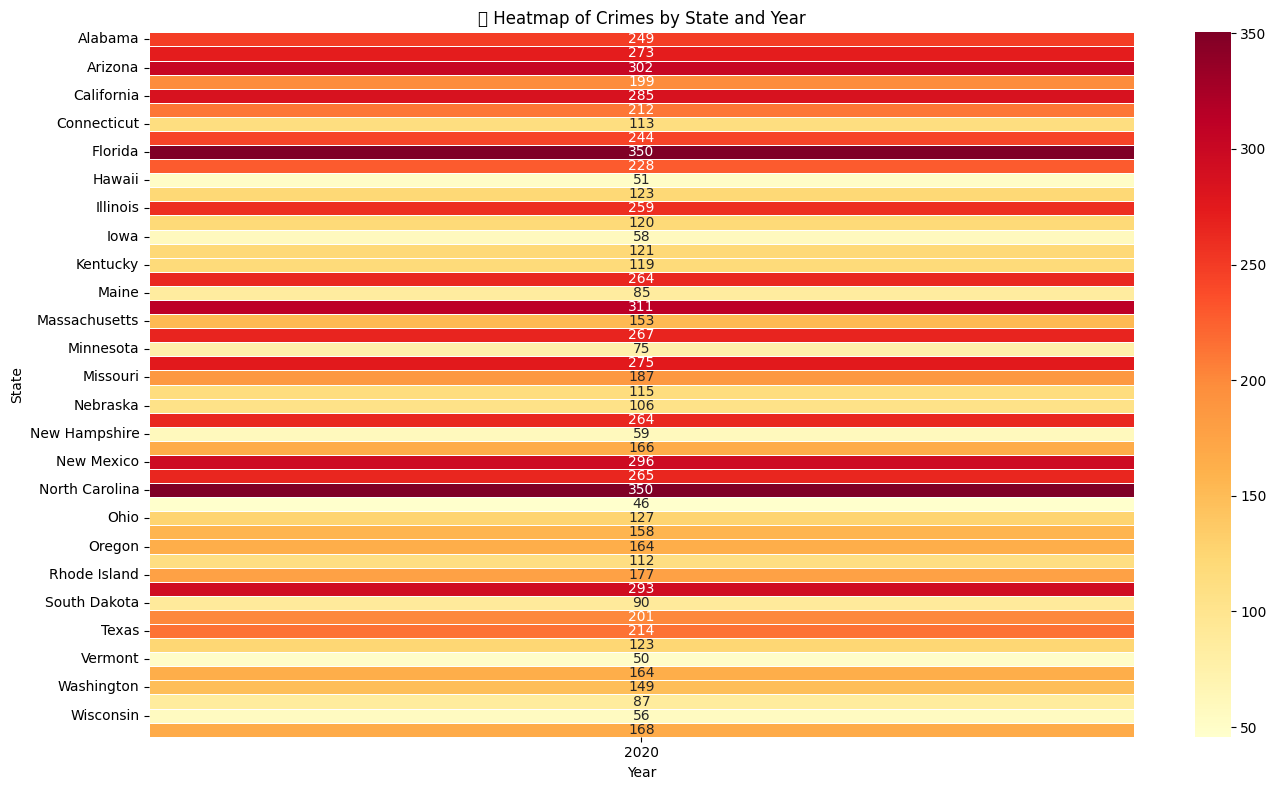

<ipython-input-30-251d43b167ec>:87: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



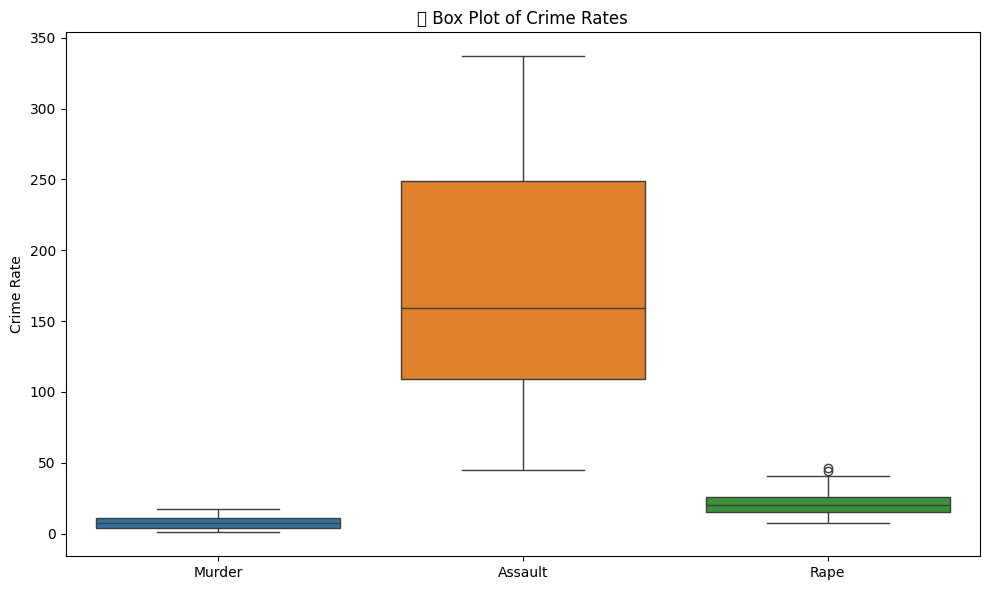

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



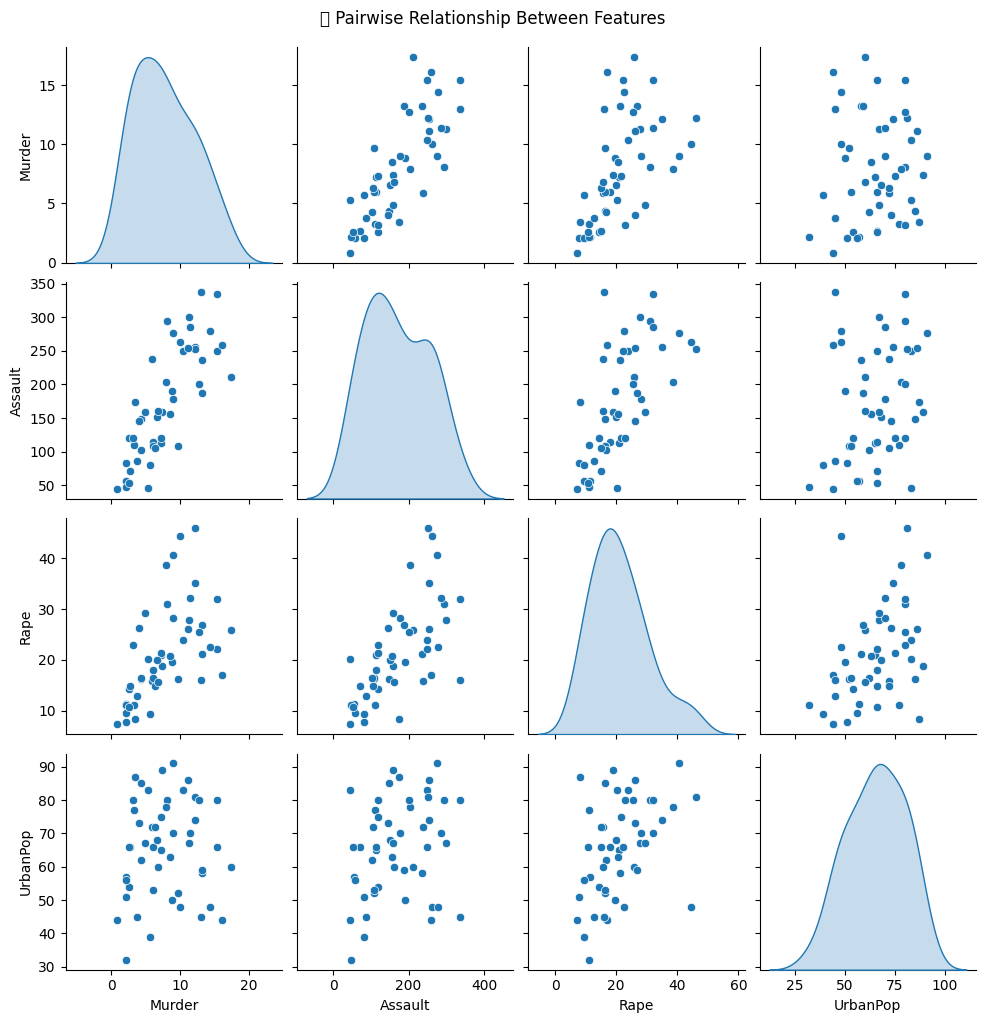

<ipython-input-30-251d43b167ec>:104: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.



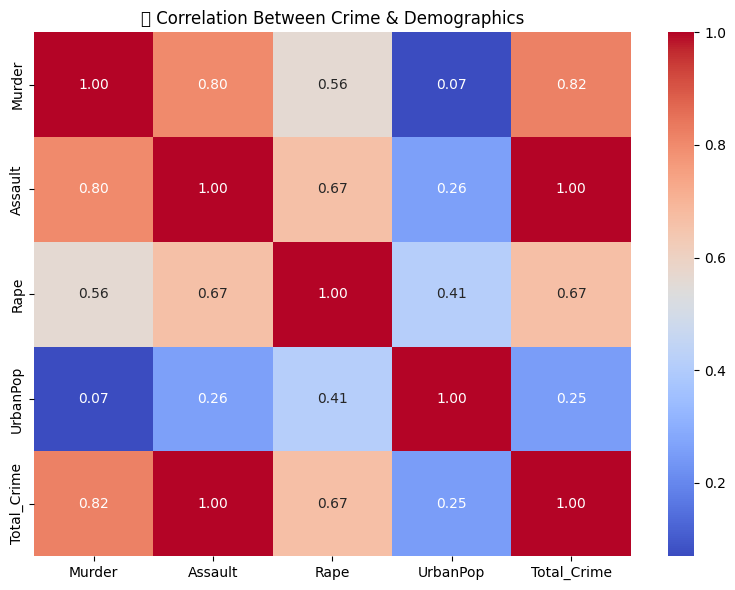

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Step 2: Load Dataset
df = pd.read_csv('/content/US_violent_crime.csv')  # Replace path if needed

# Step 3: Clean and Rename Columns
df.columns = df.columns.str.strip()
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)

# Step 4: Add Total Crime Column
df['Total_Crime'] = df[['Murder', 'Assault']].sum(axis=1)

# Optional: Add Year (if not present)
df['Year'] = 2020  # Placeholder if dataset is for one year only

# =============================
# 📊 1. Bar Plot – Total Crimes by State
# =============================
state_crime = df.groupby('State')['Total_Crime'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=state_crime.index, y=state_crime.values, palette='Blues_r')
plt.xticks(rotation=90)
plt.title("📊 Total Violent Crimes by U.S. State")
plt.ylabel("Total Crimes")
plt.tight_layout()
plt.show()

# =============================
# 📈 2. Line Plot – National Trends
# =============================
yearly = df.groupby('Year')[['Murder', 'Assault']].sum()
yearly.plot(marker='o', figsize=(12,6))
plt.title("📈 National Crime Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# 🗺️ 3. Heatmap – State-Year Crime Matrix
# =============================
heatmap_data = df.pivot_table(index='State', columns='Year', values='Total_Crime', aggfunc='sum')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5)
plt.title("🗺️ Heatmap of Crimes by State and Year")
plt.tight_layout()
plt.show()

# =============================
# 🌎 4. Choropleth Map – US Crime
# =============================
choropleth_data = df.groupby('State')[['Murder', 'Assault']].sum().reset_index()
choropleth_data['Total_Crime'] = choropleth_data[['Murder', 'Assault']].sum(axis=1)

fig = px.choropleth(
    choropleth_data,
    locations='State',
    locationmode='USA-states',
    color='Total_Crime',
    scope='usa',
    title='🌎 Choropleth – Total Violent Crimes by State',
    color_continuous_scale='Reds'
)
fig.show()

# =============================
# 🍕 5. Pie Chart – National Crime Type Distribution
# =============================
crime_types = df[['Murder', 'Assault']].sum()
fig = go.Figure(data=[go.Pie(labels=crime_types.index, values=crime_types.values, hole=0.4)])
fig.update_layout(title="🍕 National Crime Type Distribution (Murder vs Assault)")
fig.show()

# =============================
# 📦 6. Box Plot – Distribution of Crime Values Across States
# =============================
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Murder', 'Assault', 'Rape']])
plt.title("📦 Box Plot of Crime Rates")
plt.ylabel("Crime Rate")
plt.tight_layout()
plt.show()

# =============================
# 🔍 7. Pairplot – Feature Relationships
# =============================
sns.pairplot(df[['Murder', 'Assault', 'Rape', 'UrbanPop']], kind='scatter', diag_kind='kde')
plt.suptitle("🔍 Pairwise Relationship Between Features", y=1.02)
plt.show()

# =============================
# 🔗 8. Correlation Heatmap – Crime & Demographics
# =============================
plt.figure(figsize=(8,6))
corr = df[['Murder', 'Assault', 'Rape', 'UrbanPop', 'Total_Crime']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Between Crime & Demographics")
plt.tight_layout()
plt.show()


<ipython-input-31-ab1df7fbfdd6>:23: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.



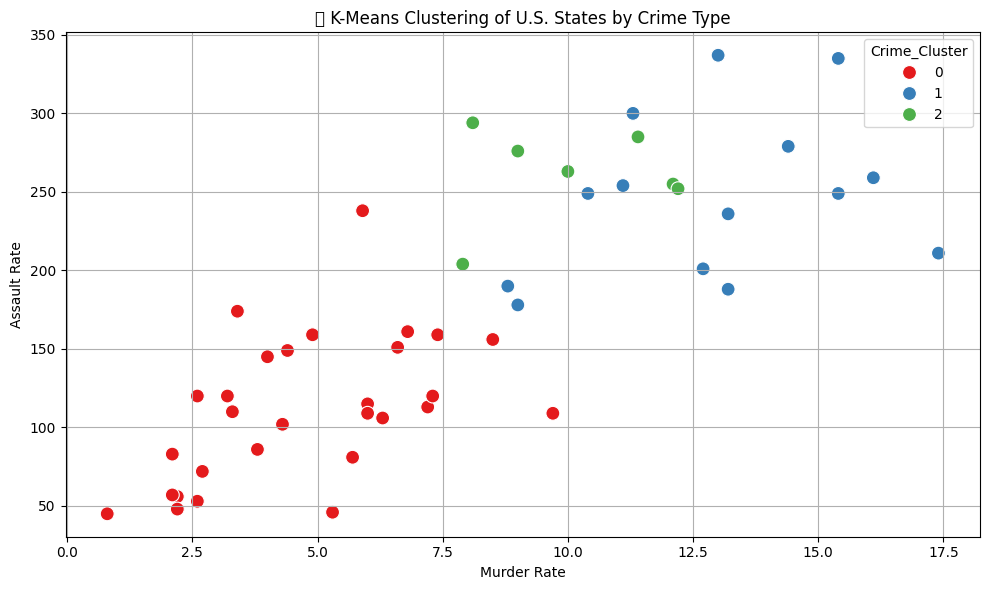

In [ ]:
# =============================
# 🚨 9. K-Means Clustering – Crime Pattern Grouping
# =============================
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Prepare features
features = df[['Murder', 'Assault', 'Rape']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Crime_Cluster'] = kmeans.fit_predict(scaled)

# Step 3: Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Murder', y='Assault', hue='Crime_Cluster', palette='Set1', s=100)
plt.title('🚨 K-Means Clustering of U.S. States by Crime Type')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# =============================
# 🎯 10. Radar Chart – Crime Profile Comparison for Selected States
# =============================
import plotly.graph_objects as go

# Step 1: Choose states for comparison
states = ['California', 'Texas', 'New York', 'Florida']
radar_data = df[df['State'].isin(states)].set_index('State')[['Murder', 'Assault', 'Rape']]

# Step 2: Normalize for better shape comparison
radar_norm = radar_data.div(radar_data.max(axis=1), axis=0)

# Step 3: Create Radar Chart
fig = go.Figure()
for state in radar_norm.index:
    fig.add_trace(go.Scatterpolar(
        r=radar_norm.loc[state].values,
        theta=radar_norm.columns,
        fill='toself',
        name=state
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="🎯 Radar Chart of Crime Type Distribution Across States"
)
fig.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



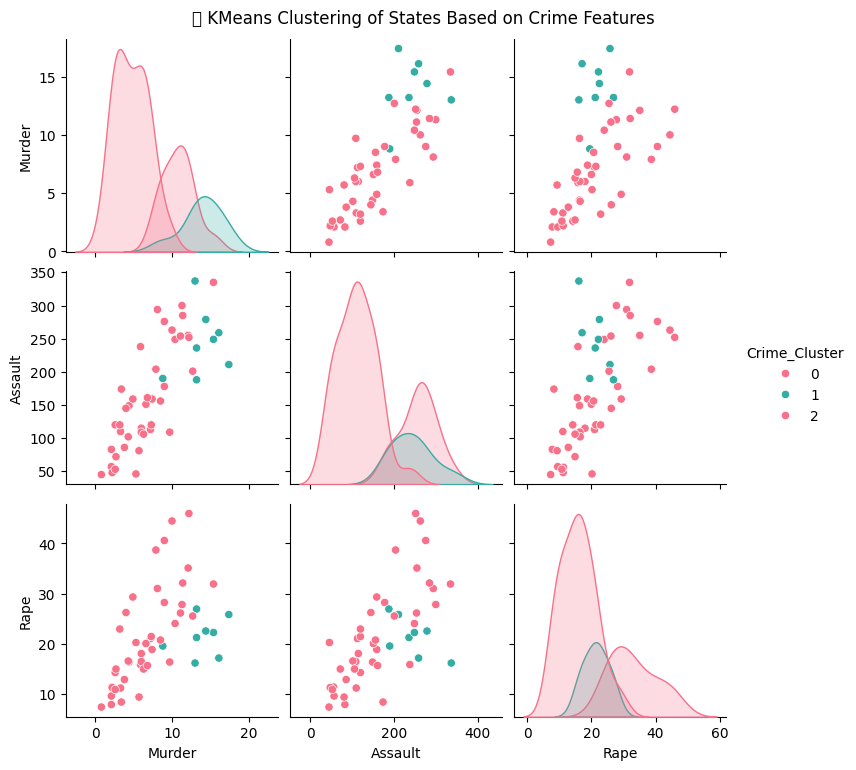


📊 Cluster Averages:
                   Murder     Assault       Rape   UrbanPop  Total_Crime
Crime_Cluster                                                          
0               4.734483  111.827586  15.820690  64.103448   116.562069
1              13.937500  243.625000  21.412500  53.750000   257.562500
2              10.815385  257.384615  33.192308  76.000000   268.200000


In [ ]:
# 🔹 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# 🔹 Step 2: Load Dataset
df = pd.read_csv('/content/US_violent_crime.csv')  # Replace with correct path
df.columns = df.columns.str.strip()
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)

# 🔹 Step 3: Add Total Crime Column
df['Total_Crime'] = df[['Murder', 'Assault']].sum(axis=1)

# 🔹 Step 4: Normalize for Clustering
features = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# 🔹 Step 5: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Crime_Cluster'] = kmeans.fit_predict(scaled)

# 🔹 Step 6: Visualize Clusters with Pairplot
sns.pairplot(df, hue='Crime_Cluster', vars=['Murder', 'Assault', 'Rape'], palette='husl')
plt.suptitle("🔍 KMeans Clustering of States Based on Crime Features", y=1.02)
plt.show()

# 🔹 Step 7: Cluster Summary Table
cluster_summary = df.groupby('Crime_Cluster')[['Murder', 'Assault', 'Rape', 'UrbanPop', 'Total_Crime']].mean()
print("\n📊 Cluster Averages:\n", cluster_summary)

# 🔹 Step 8: Choropleth by Cluster
fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="Crime_Cluster",
    color_continuous_scale='Plasma',
    scope="usa",
    title="🌎 U.S. States Clustered by Crime Patterns (KMeans)"
)
fig.show()


<ipython-input-35-6cdea4dc0666>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-35-6cdea4dc0666>:27: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



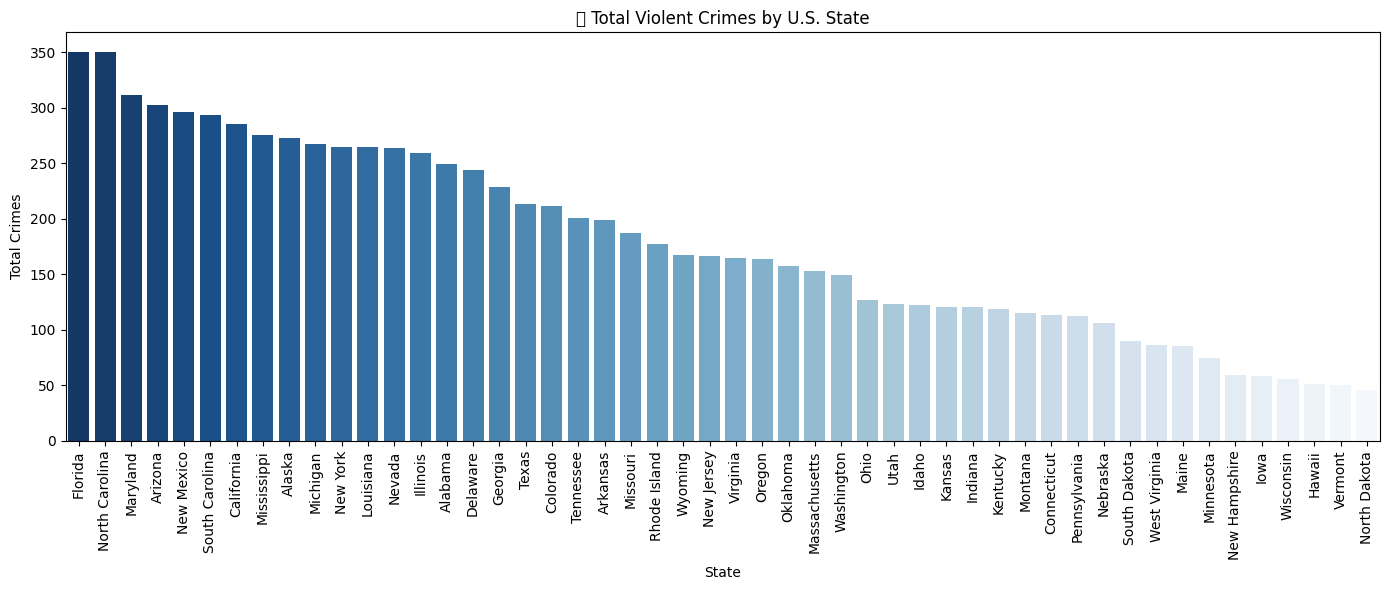

<ipython-input-35-6cdea4dc0666>:36: UserWarning:

Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.



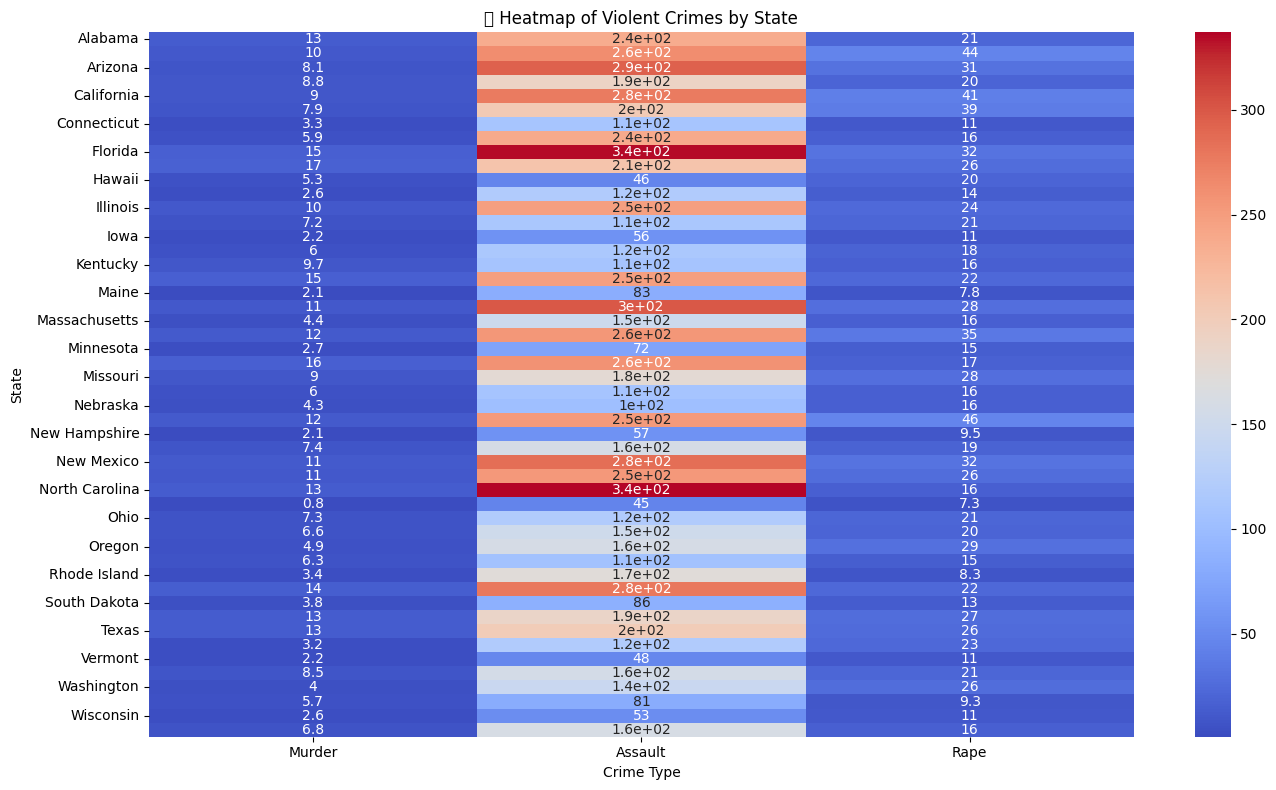

<ipython-input-35-6cdea4dc0666>:60: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



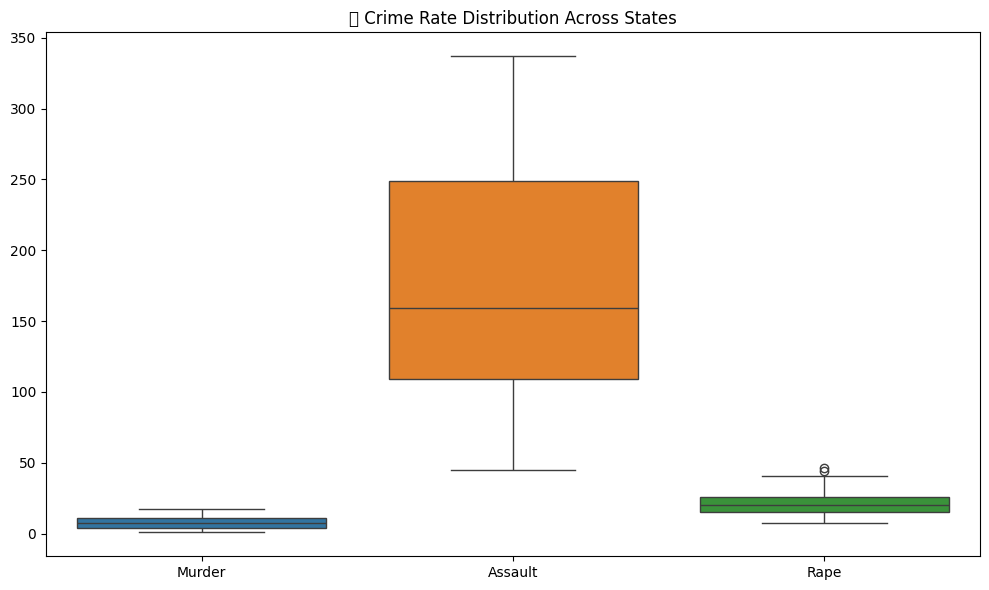

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



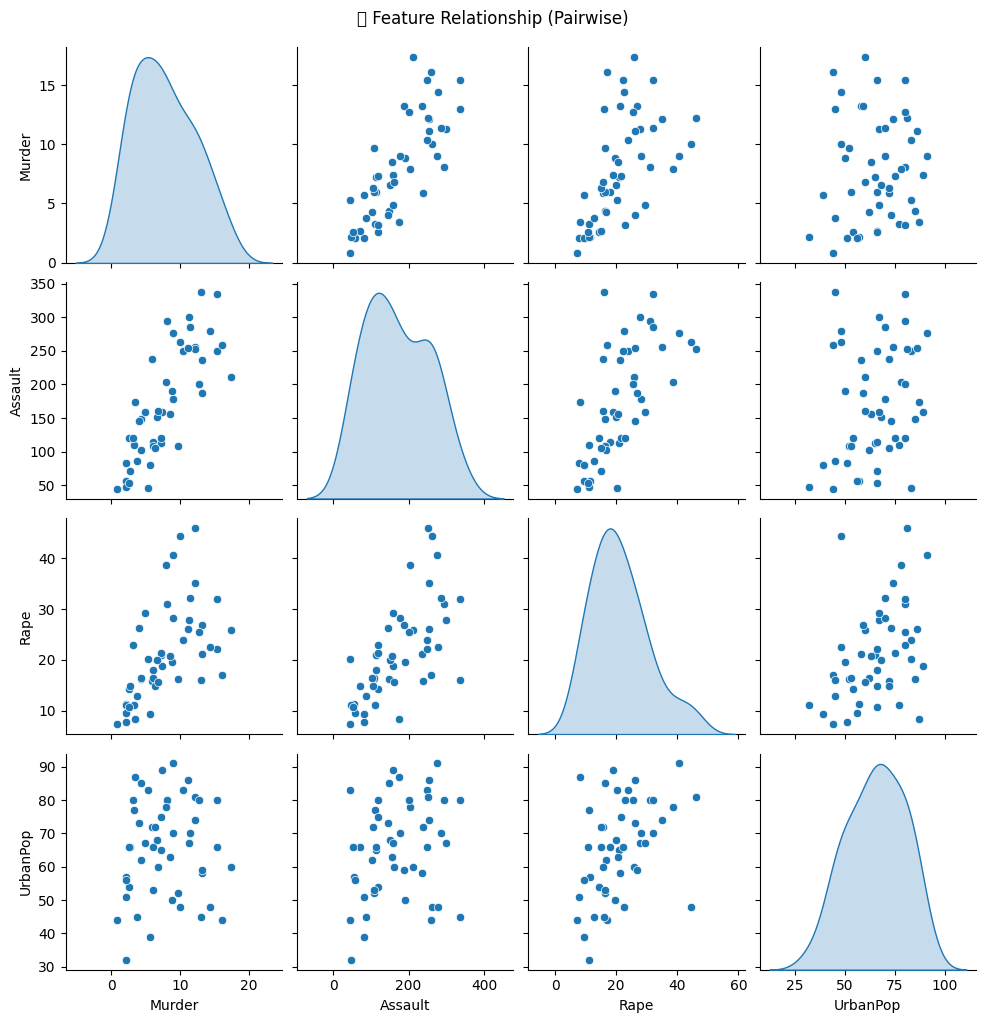

<ipython-input-35-6cdea4dc0666>:73: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.



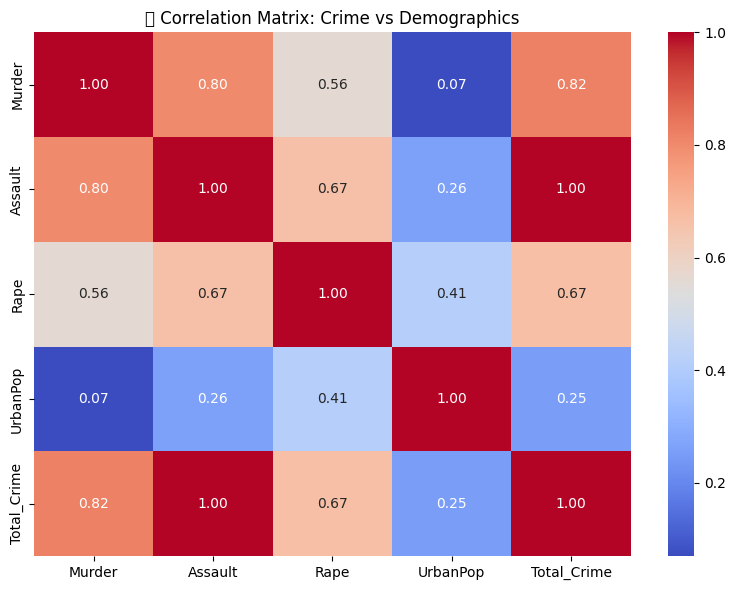

<ipython-input-35-6cdea4dc0666>:87: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.



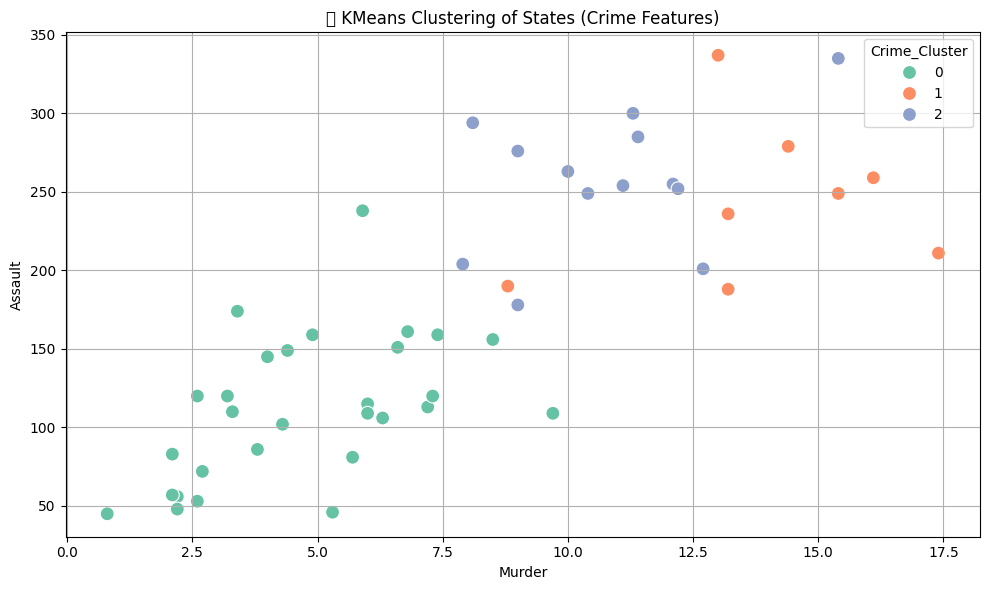

In [ ]:
# Step 0: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load and Clean Dataset
df = pd.read_csv('/content/US_violent_crime.csv')  # Update path if needed
df.columns = df.columns.str.strip()
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df.dropna(inplace=True)

# Step 2: Feature Engineering
df['Total_Crime'] = df[['Murder', 'Assault']].sum(axis=1)
df['Year'] = 2020  # Static year assumption

# Step 3: 📊 Bar Plot – Total Crimes by State
plt.figure(figsize=(14,6))
state_crime = df.groupby('State')['Total_Crime'].sum().sort_values(ascending=False)
sns.barplot(x=state_crime.index, y=state_crime.values, palette='Blues_r')
plt.xticks(rotation=90)
plt.title("📊 Total Violent Crimes by U.S. State")
plt.ylabel("Total Crimes")
plt.tight_layout()
plt.show()

# Step 4: 🗺️ Heatmap – Crime Type Per State
plt.figure(figsize=(14,8))
sns.heatmap(df.set_index('State')[['Murder', 'Assault', 'Rape']], cmap='coolwarm', annot=True)
plt.title("🗺️ Heatmap of Violent Crimes by State")
plt.xlabel("Crime Type")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Step 5: 🌎 Choropleth Map – Total Crimes
df['Total'] = df[['Murder', 'Assault', 'Rape']].sum(axis=1)
fig = px.choropleth(df,
                    locations='State',
                    locationmode='USA-states',
                    color='Total',
                    scope='usa',
                    title='🌎 Choropleth – Total Violent Crimes by State',
                    color_continuous_scale='Reds')
fig.show()

# Step 6: 🍕 Pie Chart – National Crime Distribution
crime_types = df[['Murder', 'Assault']].sum()
fig = go.Figure(data=[go.Pie(labels=crime_types.index, values=crime_types.values, hole=0.4)])
fig.update_layout(title="🍕 Crime Type Distribution (National)")
fig.show()

# Step 7: 📦 Box Plot – Crime Distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Murder', 'Assault', 'Rape']])
plt.title("📦 Crime Rate Distribution Across States")
plt.tight_layout()
plt.show()

# Step 8: 🔍 Pairplot – Feature Relationships
sns.pairplot(df[['Murder', 'Assault', 'Rape', 'UrbanPop']], kind='scatter', diag_kind='kde')
plt.suptitle("🔍 Feature Relationship (Pairwise)", y=1.02)
plt.show()

# Step 9: 🔗 Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[['Murder', 'Assault', 'Rape', 'UrbanPop', 'Total_Crime']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Matrix: Crime vs Demographics")
plt.tight_layout()
plt.show()

# Step 10: 🚨 KMeans Clustering
features = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
scaled = StandardScaler().fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Crime_Cluster'] = kmeans.fit_predict(scaled)

# Step 11: 🚨 Cluster Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Murder', y='Assault', hue='Crime_Cluster', palette='Set2', s=100)
plt.title("🚨 KMeans Clustering of States (Crime Features)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: 🌎 Cluster Choropleth
fig = px.choropleth(df, locations="State", locationmode="USA-states", color="Crime_Cluster",
                    color_continuous_scale='Plasma', scope="usa",
                    title="🌎 State-wise Crime Clusters (KMeans)")
fig.show()

# Step 13: 🎯 Radar Chart – Crime Profiles by State
selected_states = ['California', 'Texas', 'New York', 'Florida']
radar_data = df[df['State'].isin(selected_states)].set_index('State')[['Murder', 'Assault', 'Rape']]
radar_norm = radar_data.div(radar_data.max(axis=1), axis=0)

fig = go.Figure()
for state in radar_norm.index:
    fig.add_trace(go.Scatterpolar(
        r=radar_norm.loc[state].values,
        theta=radar_norm.columns,
        fill='toself',
        name=state
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="🎯 Radar Chart: Crime Distribution Across Key States"
)
fig.show()


In [ ]:
# ✅ Step 1: Upload CSV File
from google.colab import files
uploaded = files.upload()  # Upload your US_violent_crime.csv here

# ✅ Step 2: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ✅ Step 3: Load Dataset
df = pd.read_csv('US_violent_crime.csv')  # Ensure this matches your uploaded file name
df.columns = df.columns.str.strip()
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)

# ✅ Step 4: Add Total Crime Column
df['Total_Crime'] = df[['Murder', 'Assault']].sum(axis=1)
df['Year'] = 1973  # Static placeholder year for dashboard visuals

# ✅ Step 5: Bar Chart – Total Crimes by State
state_crime = df.groupby('State')['Total_Crime'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=state_crime.index, y=state_crime.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("📊 Total Violent Crimes by U.S. State")
plt.ylabel("Total Crimes")
plt.tight_layout()
plt.show()

# ✅ Step 6: Heatmap of Crime Types by State
plt.figure(figsize=(14,8))
sns.heatmap(df.set_index('State')[['Murder', 'Assault', 'Rape']], cmap='YlGnBu', annot=True)
plt.title("🗺️ Heatmap of Violent Crimes by State")
plt.xlabel("Crime Type")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# ✅ Step 7: Choropleth Map – Total Crimes by State
choropleth_data = df.copy()
choropleth_data['Total'] = df[['Murder', 'Assault', 'Rape']].sum(axis=1)
fig = px.choropleth(choropleth_data,
                    locations='State',
                    locationmode='USA-states',
                    color='Total',
                    scope='usa',
                    title='🌎 Choropleth – Total Violent Crimes by State',
                    color_continuous_scale='Reds')
fig.show()

# ✅ Step 8: Pie Chart – Crime Distribution Nationally
crime_types = df[['Murder', 'Assault']].sum()
fig = go.Figure(data=[go.Pie(labels=crime_types.index, values=crime_types.values, hole=0.4)])
fig.update_layout(title="🍕 National Crime Type Distribution (Murder vs Assault)")
fig.show()

# ✅ Step 9: Box Plot – Crime Spread
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Murder', 'Assault', 'Rape']])
plt.title("📦 Box Plot of Crime Rates Across States")
plt.ylabel("Crime Rate")
plt.tight_layout()
plt.show()

# ✅ Step 10: Pairplot – Feature Relationships
sns.pairplot(df[['Murder', 'Assault', 'Rape', 'UrbanPop']], kind='scatter', diag_kind='kde')
plt.suptitle("🔍 Pairwise Relationship Between Features", y=1.02)
plt.show()

# ✅ Step 11: Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[['Murder', 'Assault', 'Rape', 'UrbanPop', 'Total_Crime']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Matrix: Crime & Demographics")
plt.tight_layout()
plt.show()

# ✅ Step 12: KMeans Clustering
features = df[['Murder', 'Assault', 'Rape']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Crime_Cluster'] = kmeans.fit_predict(scaled)

# ✅ Step 13: Scatter Cluster Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Murder', y='Assault', hue='Crime_Cluster', palette='Set1', s=100)
plt.title('🚨 KMeans Clustering by Crime Types')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Step 14: Radar Chart – Compare Top States
radar_states = ['California', 'Texas', 'New York', 'Florida']
radar_data = df[df['State'].isin(radar_states)].set_index('State')[['Murder', 'Assault', 'Rape']]
radar_norm = radar_data.div(radar_data.max(axis=1), axis=0)

fig = go.Figure()
for state in radar_norm.index:
    fig.add_trace(go.Scatterpolar(
        r=radar_norm.loc[state].values,
        theta=radar_norm.columns,
        fill='toself',
        name=state
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="🎯 Radar Chart – Crime Profile Comparison"
)
fig.show()


KeyboardInterrupt: 

In [ ]:
# 🔹 Step 1: Import Libraries
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Step 2: Load and Clean Dataset
df = pd.read_csv('/content/US_violent_crime.csv')  # Adjust path if needed
df.columns = df.columns.str.strip()
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df.dropna(inplace=True)

# 🔹 Step 3: Feature Engineering
df['Total_Crime'] = df[['Murder', 'Assault']].sum(axis=1)
df['Year'] = 2020  # Static for compatibility

# 🔹 Step 4: Create Dashboard with Plotly Subplots
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("📊 Top 10 States by Total Crimes",
                    "🍕 National Crime Type Distribution",
                    "📦 Crime Category Box Plot",
                    "🔗 Correlation Matrix Heatmap")
)

# 📊 Top 10 Bar Chart
top10 = df.sort_values(by='Total_Crime', ascending=False).head(10)
fig.add_trace(
    go.Bar(x=top10['State'], y=top10['Total_Crime'], marker_color='crimson', name='Top Crimes'),
    row=1, col=1
)

# 🍕 Pie Chart
crime_totals = df[['Murder', 'Assault']].sum()
fig.add_trace(
    go.Pie(labels=crime_totals.index, values=crime_totals.values, hole=0.4),
    row=1, col=2
)

# 📦 Box Plots
fig.add_trace(go.Box(y=df['Murder'], name='Murder', marker_color='red'), row=2, col=1)
fig.add_trace(go.Box(y=df['Assault'], name='Assault', marker_color='orange'), row=2, col=1)
fig.add_trace(go.Box(y=df['Rape'], name='Rape', marker_color='purple'), row=2, col=1)

# 🔗 Correlation Heatmap
corr = df[['Murder', 'Assault', 'Rape', 'UrbanPop', 'Total_Crime']].corr().round(2)
heatmap = go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Viridis',
    showscale=True
)
fig.add_trace(heatmap, row=2, col=2)

# 🔹 Layout Settings
fig.update_layout(
    height=900,
    width=1200,
    title_text="📊 Crime Analysis Dashboard – U.S. States (1973)",
    showlegend=False
)

fig.show()


ValueError: Trace type 'pie' is not compatible with subplot type 'xy'
at grid position (1, 2)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types

In [ ]:
# 🔹 Step 4: Professional Dashboard with Plotly Subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create the subplot layout
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "📊 Top 10 States by Total Violent Crimes",
        "🍕 National Crime Type Distribution",
        "📦 Crime Category Distribution Across States",
        "🔗 Correlation Matrix: Crime & Demographics"
    ),
    specs=[
        [{"type": "xy"}, {"type": "domain"}],
        [{"type": "xy"}, {"type": "xy"}]
    ]
)

# 📊 Top 10 Bar Chart
top10 = df.sort_values(by='Total_Crime', ascending=False).head(10)
fig.add_trace(
    go.Bar(
        x=top10['State'],
        y=top10['Total_Crime'],
        marker_color='crimson',
        name='Top 10 States',
        hovertemplate='State: %{x}<br>Total Crime: %{y}'
    ),
    row=1, col=1
)

# 🍕 Pie Chart – Crime Type Distribution
crime_totals = df[['Murder', 'Assault']].sum()
fig.add_trace(
    go.Pie(
        labels=crime_totals.index,
        values=crime_totals.values,
        hole=0.4,
        textinfo='label+percent',
        hoverinfo='label+value',
        marker=dict(colors=['#EF553B', '#636EFA']),
        name='Crime Type Distribution'
    ),
    row=1, col=2
)

# 📦 Box Plot – Crime Category Distribution
fig.add_trace(go.Box(y=df['Murder'], name='Murder', marker_color='firebrick'), row=2, col=1)
fig.add_trace(go.Box(y=df['Assault'], name='Assault', marker_color='darkorange'), row=2, col=1)
fig.add_trace(go.Box(y=df['Rape'], name='Rape', marker_color='purple'), row=2, col=1)

# 🔗 Correlation Matrix Heatmap
corr = df[['Murder', 'Assault', 'Rape', 'UrbanPop', 'Total_Crime']].corr().round(2)
fig.add_trace(
    go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='Viridis',
        colorbar=dict(title="Correlation"),
        hovertemplate='Correlation between %{x} and %{y}: %{z}',
        name='Correlation Heatmap'
    ),
    row=2, col=2
)

# 🔹 Layout Settings
fig.update_layout(
    height=950,
    width=1200,
    title={
        'text': "📊 Interactive Crime Dashboard – U.S. States (1973)",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=22, color='darkblue')
    },
    font=dict(family="Arial", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=90),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()
